In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('mnist_train.csv').to_numpy()
labels = data[:,0]
data = data[:,1:]
mean = np.mean(data,axis=0)
data = data - mean

In [3]:
def display(data, labels, title):
    for i in range(10):
        d = data[labels==i]
        plt.scatter(d[:,0],d[:,1],s=2)
        plt.title(title, fontsize=25)

In [4]:
def calc_del_noreg(X, C): 
    P = X @ C @ C.T - X
    Q = X.T @ P
    J = ((Q + Q.T) @ C)/np.linalg.norm(P)
    return J

In [24]:
def calc_del_l1(X, C): 
    P = X @ C @ C.T - X    
    Q = X.T @ P
    J = ((Q + Q.T) @ C)/np.linalg.norm(P) + 0.00001 * (X.T @ np.sign(X @ C) + np.sign(C))
    return J

In [20]:
def calc_del_l2(X, C): 
    P = X @ C @ C.T - X
    Q = X.T @ P
    J = ((Q + Q.T) @ C)/np.linalg.norm(P) + 0.00001 * ((X.T @ X @ C)/np.linalg.norm(X @ C) + C/np.linalg.norm(C))
    return J

In [7]:
def grd_noreg(data,alpha,bs,iters):
    w = np.random.rand(784, 2)
    C,_ = np.linalg.qr(w)
    for i in range(iters):
        mask = np.random.choice([False, True], 60000, p=[1-bs, bs])
        dell = calc_del_noreg(data[mask], C)
        C = C - alpha * dell
    return C 

In [25]:
def grd_l1(data,alpha,bs,iters):
    w = np.random.rand(784, 2)
    C,_ = np.linalg.qr(w)
    for i in range(iters):
        mask = np.random.choice([False, True], 60000, p=[1-bs, bs])
        dell = calc_del_l1(data[mask], C)
        C = C - alpha * dell
    return C    

In [21]:
def grd_l2(data,alpha,bs,iters):
    w = np.random.rand(784, 2)
    C,_ = np.linalg.qr(w)
    for i in range(iters):
        mask = np.random.choice([False, True], 60000, p=[1-bs, bs])
        dell = calc_del_l2(data[mask], C)
        C = C - alpha * dell
    return C   

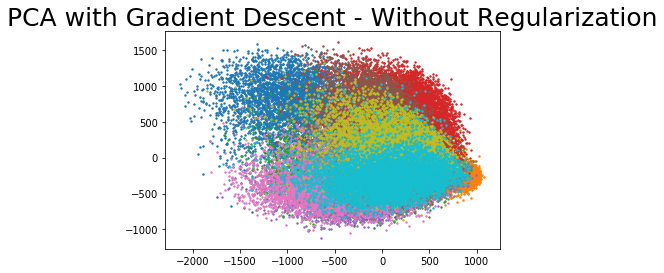

In [15]:
alpha = 0.000005
bs = 0.1
iters = 110
basis_noreg = grd_noreg(data, alpha, bs, iters)
projected_noreg = data @ basis_noreg
reconstructed_noreg = projected_noreg @ basis_noreg.T
display(projected_noreg,labels, "PCA with Gradient Descent - Without Regularization")

(60000, 784)


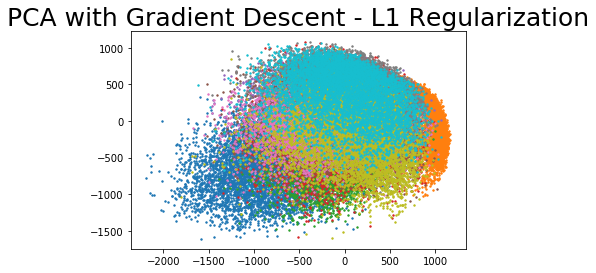

In [27]:
alpha = 0.000005
bs = 0.1
iters = 110
basis_l1 = grd_l1(data, alpha, bs, iters)
projected_l1 = data @ basis_l1
reconstructed_l1 = projected_l1 @ basis_l1.T
print(reconstructed_l1.shape)
display(projected_l1,labels, "PCA with Gradient Descent - L1 Regularization")

(60000, 784)


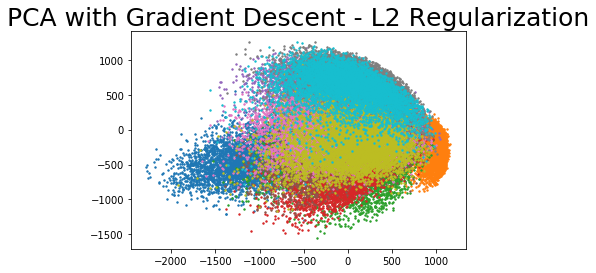

In [22]:
alpha = 0.000005
bs = 0.1
iters = 110
basis_l2 = grd_l2(data, alpha, bs, iters)
projected_l2 = data @ basis_l2
reconstructed_l2 = projected_l2 @ basis_l2.T
print(reconstructed_l2.shape)
display(projected_l2,labels, "PCA with Gradient Descent - L2 Regularization")  

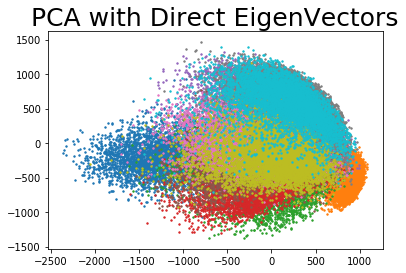

In [13]:
C = np.cov(data.T)
(V, D) = np.linalg.eigh(C)
V = V[::-1]
D = D.T[::-1].T
P = D[:, :2]
proj = data @ P
reconstructed_closed = proj @ P.T
display(proj, labels, "PCA with Direct EigenVectors")

In [28]:
total = 60000

error_noreg = np.sum(np.abs(data - reconstructed_noreg))/total
error_l1 = np.sum(np.abs(data - reconstructed_l1))/total
error_l2 = np.sum(np.abs(data - reconstructed_l2))/total
error_close = np.sum(np.abs(data - reconstructed_closed))/total
print("Error with No Regularization: ", error_noreg)
print("Error with L1 Regularization: ", error_l1)
print("Error with L2 Regularization: ", error_l2)
print("Error with EigenVector PCA: ", error_close)

Error with No Regularization:  26610.74793500778
Error with L1 Regularization:  27189.178784214644
Error with L2 Regularization:  26237.986976471442
Error with EigenVector PCA:  26138.089384162788
